In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 133s 1us/step


In [3]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
Y_train=tf.keras.utils.to_categorical(Y_train,10)
Y_test=tf.keras.utils.to_categorical(Y_test,10)

In [10]:
model=tf.keras.Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=100,verbose=1,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 18s 43ms/step - loss: 1.6629 - accuracy: 0.3849 - val_loss: 1.4100 - val_accuracy: 0.4903
Epoch 2/10
400/400 [==============================] - 17s 42ms/step - loss: 1.3162 - accuracy: 0.5297 - val_loss: 1.2797 - val_accuracy: 0.5462
Epoch 3/10
400/400 [==============================] - 15s 39ms/step - loss: 1.1781 - accuracy: 0.5849 - val_loss: 1.2008 - val_accuracy: 0.5804
Epoch 4/10
400/400 [==============================] - 16s 40ms/step - loss: 1.0791 - accuracy: 0.6201 - val_loss: 1.0485 - val_accuracy: 0.6316
Epoch 5/10
400/400 [==============================] - 16s 39ms/step - loss: 1.0002 - accuracy: 0.6489 - val_loss: 1.0057 - val_accuracy: 0.6469
Epoch 6/10
400/400 [==============================] - 16s 40ms/step - loss: 0.9405 - accuracy: 0.6708 - val_loss: 0.9945 - val_accuracy: 0.6511
Epoch 7/10
400/400 [==============================] - 17s 42ms/step - loss: 0.8834 - accuracy: 0.6923 - val_loss: 0.9920 - val_accuracy:

In [12]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=int(input("Enter an index(0to9999) for test image:"))
if index<0 or index>=len(X_test):
    print("Invalid")
    index=0
    

Enter an index(0to9999) for test image:10


1/1 [==============================] - 0s 27ms/step


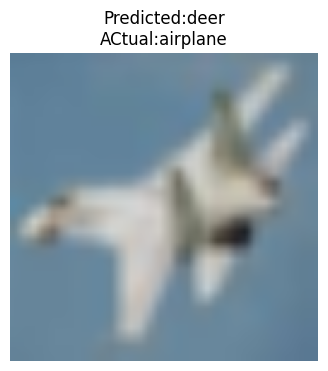

In [16]:
test_image=X_test[index]
true_label=np.argmax(Y_test[index])
prediction=model.predict(np.expand_dims(test_image,axis=0))
predicted_label=np.argmax(prediction)
plt.figure(figsize=(4,4))
resized_image=tf.image.resize(test_image,[128,128])
plt.imshow(resized_image)
plt.title(f"Predicted:{class_names[predicted_label]}\nACtual:{class_names[true_label]}")
plt.axis('off')
plt.show()